<a href="https://colab.research.google.com/github/zaenalSamsul/UTS_PENGOLAHAN_CITRA/blob/main/image_Transformasi_No_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Seminar.jpg to Seminar.jpg


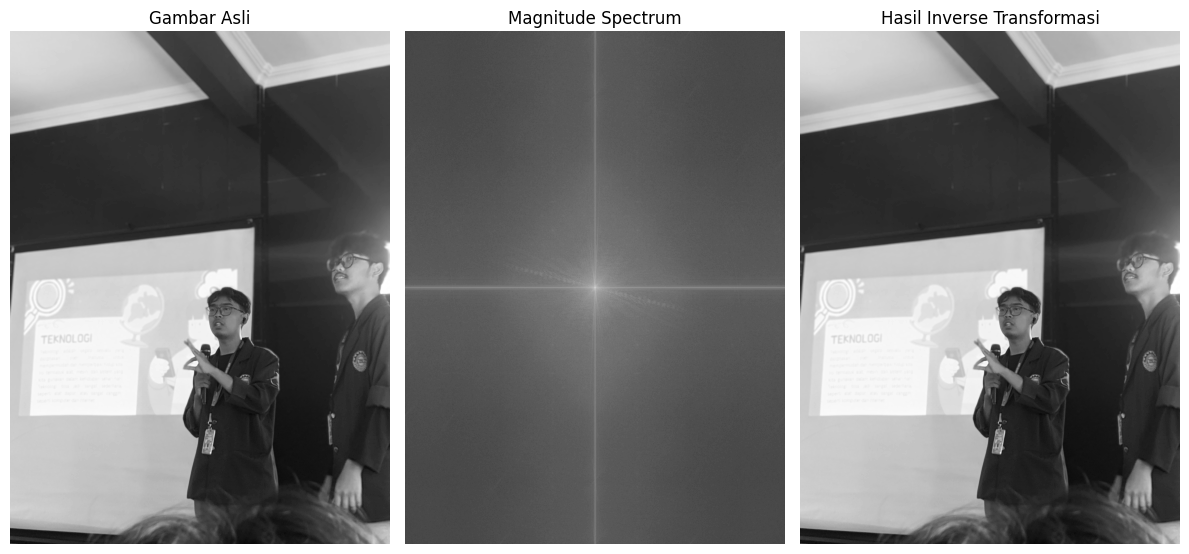

Magnitude spectrum menggambarkan intensitas setiap frekuensi dalam citra.
Bagian tengah merepresentasikan frekuensi rendah, yang menunjukkan informasi umum seperti pencahayaan.
Frekuensi tinggi, berada di pinggir, menunjukkan detail atau tepi dalam citra.


In [2]:
# 1. Unggah file menggunakan Google Colab
from google.colab import files
uploaded = files.upload()  # Mengunggah file gambar

# 2. Impor pustaka yang diperlukan
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 3. Membaca citra grayscale
image_path = next(iter(uploaded.keys()))  # Mendapatkan nama file yang diunggah
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Membaca citra grayscale

if image is None:
    print("Gambar tidak ditemukan. Pastikan Anda mengunggah file yang benar.")
    exit()

# 4. Lakukan Transformasi Fourier
f_transform = np.fft.fft2(image)  # Fourier transform
f_shift = np.fft.fftshift(f_transform)  # Geser frekuensi nol ke tengah
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Hindari log(0) dengan +1

# 5. Inverse Transformasi Fourier
f_ishift = np.fft.ifftshift(f_shift)  # Geser kembali
image_reconstructed = np.fft.ifft2(f_ishift)  # Inverse Fourier transform
image_reconstructed = np.abs(image_reconstructed)  # Magnitudo citra hasil inversi

# 6. Visualisasi hasil
plt.figure(figsize=(12, 8))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Gambar hasil inverse Transformasi Fourier
plt.subplot(1, 3, 3)
plt.title("Hasil Inverse Transformasi")
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Penjelasan Magnitude Spectrum
print("Magnitude spectrum menggambarkan intensitas setiap frekuensi dalam citra.")
print("Bagian tengah merepresentasikan frekuensi rendah, yang menunjukkan informasi umum seperti pencahayaan.")
print("Frekuensi tinggi, berada di pinggir, menunjukkan detail atau tepi dalam citra.")


**Penjelasan Transformasi Fourier pada Citra Grayscale**
Transformasi Fourier mengubah citra dari domain spasial (representasi dalam bentuk piksel) ke domain frekuensi. Dalam domain frekuensi:

1. Frekuensi rendah (terletak di tengah magnitude spectrum) merepresentasikan elemen-elemen umum dalam citra, seperti pencahayaan atau pola besar.
2. Frekuensi tinggi (terletak di tepi magnitude spectrum) mewakili detail kecil dalam citra, seperti tepi atau tekstur halus.

Pada gambar asli (kiri), terdapat elemen-elemen dominan seperti teks pada layar presentasi dan detail orang yang sedang berbicara. Transformasi Fourier memecah elemen-elemen tersebut ke dalam berbagai frekuensi untuk dianalisis.

**Penjelasan Magnitude Spectrum**

Magnitude spectrum (gambar tengah) menunjukkan intensitas dari berbagai frekuensi di citra. Penjelasan tampilan:

1. Bagian tengah: Ini adalah komponen frekuensi rendah, yang menunjukkan informasi global dari citra, seperti pencahayaan seragam dan bentuk besar.
2. Pola silang terang: Garis terang horizontal dan vertikal yang melintasi bagian tengah biasanya berasal dari pola atau struktur yang dominan secara spasial, seperti batas objek atau perbedaan tajam antara gelap dan terang.
3. Area pinggiran: Menggambarkan frekuensi tinggi, yang berhubungan dengan detail kecil atau tekstur halus. Dalam citra ini, area pinggiran lebih gelap, menandakan bahwa detail kecil kurang dominan dibandingkan dengan elemen besar seperti teks atau pencahayaan.

Magnitude spectrum memberikan gambaran tentang distribusi informasi dalam domain frekuensi dan membantu memahami struktur dalam citra.

**Penjelasan Gambar Hasil Invers Transformasi**

Gambar hasil invers transformasi (gambar kanan) adalah rekonstruksi dari domain frekuensi kembali ke domain spasial. Rekonstruksi ini harus sangat mirip dengan gambar asli jika tidak ada informasi frekuensi yang dihilangkan selama proses transformasi. Pada hasil invers ini:

1. Detail citra seperti orang yang sedang berbicara dan teks pada layar tetap terlihat dengan jelas.
2. Perubahan intensitas piksel pada gambar asli tetap dipertahankan.

**Informasi yang Dapat Diperoleh dari Magnitude Spectrum**
1. Analisis Pola Dominan: Garis terang pada magnitude spectrum menunjukkan pola-pola dominan dalam citra, seperti garis lurus atau tepi tajam.
2.Frekuensi Rendah dan Tinggi: Bagian tengah menggambarkan pencahayaan global, sedangkan area pinggir menggambarkan detail kecil. Dengan ini, kita dapat memahami bagaimana informasi citra tersebar dalam domain frekuensi.
3. Deteksi Noise: Frekuensi tinggi pada pinggiran seringkali dikaitkan dengan noise atau detail kecil dalam citra. Dengan memahami magnitude spectrum, kita dapat memfilter noise jika diperlukan.

Transformasi Fourier sangat berguna untuk aplikasi seperti pemrosesan citra medis, pengenalan pola, atau kompresi citra, di mana analisis frekuensi sering diperlukan.
